# **Clustering Visualizations**
- Interactive world map showing political risk clusters
- Cluster profile analysis and country rankings
- Geographic distribution patterns of democratic governance
- Business insights for investment decision-making

### Preloading necessary libraries

In [12]:
import pandas as pd # DataFrame creation

import matplotlib.pyplot as plt # Visualizations
import seaborn as sns # Visualizations
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler # Preprocessing - Scaling
from sklearn.cluster import KMeans # K-means Clustering
from sklearn.cluster import AgglomerativeClustering # Hierarchical Clustering

In [13]:
# Loading dataset
path = 'https://raw.githubusercontent.com/JustGlowing/minisom/refs/heads/master/examples/democracy_index.csv'
df = pd.read_csv(path)

# Initialise the Scaler
scaler = StandardScaler()

# Filtering data
data_df=df.drop(columns=['democracy_index','rank','country','Unnamed: 0','category'])
data_df.head()

# To scale data
scaled_data=scaler.fit_transform(data_df)

# Using K-Means for clustering
kmeans = KMeans(n_clusters=5, n_init=10)
clusters = kmeans.fit_predict(scaled_data)
df['cluster'] = clusters


## **Traditional vs Algorithmic Classification Comparison**

In [14]:
# Traditional EIU Categories
print("Traditional EIU Categories")
df.groupby('category')['democracy_index'].agg(['count', 'mean', 'std', 'min', 'max']).sort_values('mean', ascending=True)

print("\nK-means Clusters")
df.groupby('cluster')['democracy_index'].agg(['count', 'mean', 'std', 'min', 'max']).sort_values('mean', ascending=True)

Traditional EIU Categories

K-means Clusters


,count,mean,std,min,max
cluster,,,,,
1,17,1.881176,0.363385,1.08,2.37
4,40,3.372000,0.463931,2.45,4.37
3,35,5.268857,0.489061,4.17,5.98
0,47,6.877447,0.526710,6.03,7.84
2,28,8.586071,0.614620,7.79,9.87


## **Global Political Risk Distribution**
Interactive map showing how democratic governance clusters geographically

In [15]:
# Create world map colored by cluster
fig = px.choropleth(df, 
                   locations='country', 
                   locationmode='country names',
                   color='cluster',
                   hover_data=['democracy_index'],
                   color_discrete_sequence=px.colors.qualitative.Set1,
                   title="Global Political Risk Clusters")
fig.show()

C:\Users\aleja\AppData\Local\Temp\ipykernel_36812\4039979949.py:2: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



## **Cluster Overlap Analysis**
Density plots reveal significant boundary ambiguities between political risk tiers

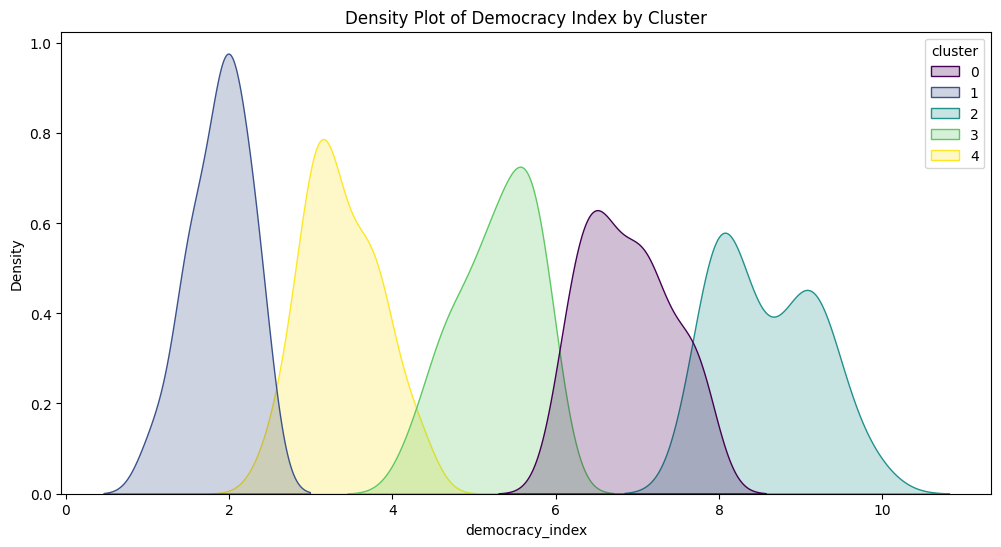

In [16]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='democracy_index', hue='cluster', common_norm=False, fill=True, palette='viridis')

plt.title("Density Plot of Democracy Index by Cluster")
plt.show()

The density visualization confirms substantial overlap between clusters, particularly clusters 0-3, supporting the conclusion that many countries exist in transitional governance zones requiring individual assessment beyond algorithmic classification.

## **Cluster Country Listings**

In [17]:
# Individual cluster country listings
for cluster in range(5):
    cluster_data = df[df['cluster'] == cluster].sort_values('democracy_index', ascending=False)
    print(f"\n--- Cluster {cluster} ({len(cluster_data)} countries) ---")
    print("Countries:", ", ".join(cluster_data['country'].tolist()))


--- Cluster 0 (47 countries) ---
Countries: Portugal, France, Belgium, Republic of China (Taiwan), Italy, Czech Republic, Cyprus, Slovenia, Lithuania, Latvia, Greece, South Africa, India, Timor-Leste, Trinidad and Tobago, Slovakia, Panama, Bulgaria, Argentina, Jamaica, Suriname, Brazil, Colombia, Malaysia, Philippines, Poland, Guyana, Lesotho, Ghana, Hungary, Peru, Croatia, Dominican Republic, Mongolia, Serbia, Tunisia, Indonesia, Singapore, Romania, Ecuador, Namibia, Paraguay, Sri Lanka, Mexico, Hong Kong, Senegal, Papua New Guinea

--- Cluster 1 (17 countries) ---
Countries: Eritrea, Laos, Burundi, Libya, Sudan, Uzbekistan, Guinea-Bissau, Yemen, Saudi Arabia, Tajikistan, Equatorial Guinea, Turkmenistan, Chad, Central African Republic, Democratic Republic of the Congo, Syria, North Korea

--- Cluster 2 (28 countries) ---
Countries: Norway, Iceland, Sweden, New Zealand, Denmark, Ireland, Canada, Finland, Australia, Switzerland, Netherlands, Luxembourg, Germany, United Kingdom, Uruguay